In [105]:
import pandas as pd
import os
pd.set_option('display.max_columns', 200)

In [1]:
os.getcwd()

'/Users/macintosh/github/predict_student_performance_from_game_play'

In [44]:
train_csv = '/Users/macintosh/Desktop/data_completitions/Kaggle/2023/predict-student-performance-from-game-play/train.csv'
df_train = pd.read_csv(train_csv, dtype_backend = 'pyarrow')

In [45]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26296946 entries, 0 to 26296945
Data columns (total 20 columns):
 #   Column          Dtype          
---  ------          -----          
 0   session_id      int64[pyarrow] 
 1   index           int64[pyarrow] 
 2   elapsed_time    int64[pyarrow] 
 3   event_name      string[pyarrow]
 4   name            string[pyarrow]
 5   level           int64[pyarrow] 
 6   page            double[pyarrow]
 7   room_coor_x     double[pyarrow]
 8   room_coor_y     double[pyarrow]
 9   screen_coor_x   double[pyarrow]
 10  screen_coor_y   double[pyarrow]
 11  hover_duration  double[pyarrow]
 12  text            string[pyarrow]
 13  fqid            string[pyarrow]
 14  room_fqid       string[pyarrow]
 15  text_fqid       string[pyarrow]
 16  fullscreen      int64[pyarrow] 
 17  hq              int64[pyarrow] 
 18  music           int64[pyarrow] 
 19  level_group     string[pyarrow]
dtypes: double[pyarrow](6), int64[pyarrow](7), string[pyarrow](7)
memor

In [31]:
df_train.head()

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group
0,20090312431273200,0,0,cutscene_click,basic,0,<NA>,-413.991405,-159.314686,380.0,494.0,<NA>,undefined,intro,tunic.historicalsociety.closet,tunic.historicalsociety.closet.intro,0,0,1,0-4
1,20090312431273200,1,1323,person_click,basic,0,<NA>,-413.991405,-159.314686,380.0,494.0,<NA>,"Whatcha doing over there, Jo?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
2,20090312431273200,2,831,person_click,basic,0,<NA>,-413.991405,-159.314686,380.0,494.0,<NA>,Just talking to Teddy.,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
3,20090312431273200,3,1147,person_click,basic,0,<NA>,-413.991405,-159.314686,380.0,494.0,<NA>,I gotta run to my meeting!,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
4,20090312431273200,4,1863,person_click,basic,0,<NA>,-412.991405,-159.314686,381.0,494.0,<NA>,"Can I come, Gramps?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4


In [34]:
df_train.duplicated(subset=['session_id', 'event_name', 'elapsed_time']).sum()

26044185

In [36]:
df_train.loc[df_train.duplicated(subset=['session_id', 'event_name'])].head()

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group
2,20090312431273200,2,831,person_click,basic,0,<NA>,-413.991405,-159.314686,380.0,494.0,<NA>,Just talking to Teddy.,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
3,20090312431273200,3,1147,person_click,basic,0,<NA>,-413.991405,-159.314686,380.0,494.0,<NA>,I gotta run to my meeting!,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
4,20090312431273200,4,1863,person_click,basic,0,<NA>,-412.991405,-159.314686,381.0,494.0,<NA>,"Can I come, Gramps?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
5,20090312431273200,5,3423,person_click,basic,0,<NA>,-412.991405,-157.314686,381.0,492.0,<NA>,"Sure thing, Jo. Grab your notebook and come up...",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
6,20090312431273200,6,5197,person_click,basic,0,<NA>,478.485079,-199.971679,593.0,485.0,<NA>,"See you later, Teddy.",teddy,tunic.historicalsociety.closet,tunic.historicalsociety.closet.teddy.intro_0_cs_0,0,0,1,0-4


In [38]:
df_train.query('session_id == 20090312431273200 & event_name == "person_click"').head()

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group
1,20090312431273200,1,1323,person_click,basic,0,<NA>,-413.991405,-159.314686,380.0,494.0,<NA>,"Whatcha doing over there, Jo?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
2,20090312431273200,2,831,person_click,basic,0,<NA>,-413.991405,-159.314686,380.0,494.0,<NA>,Just talking to Teddy.,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
3,20090312431273200,3,1147,person_click,basic,0,<NA>,-413.991405,-159.314686,380.0,494.0,<NA>,I gotta run to my meeting!,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
4,20090312431273200,4,1863,person_click,basic,0,<NA>,-412.991405,-159.314686,381.0,494.0,<NA>,"Can I come, Gramps?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
5,20090312431273200,5,3423,person_click,basic,0,<NA>,-412.991405,-157.314686,381.0,492.0,<NA>,"Sure thing, Jo. Grab your notebook and come up...",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4


In [76]:
df_train_sample = df_train.sample(frac=0.1, random_state=1)

In [44]:
df_train.query('session_id == 20090312431273200 & event_name == "person_click"')\
    .groupby(['session_id', 'event_name'])[['session_id']]\
    .count()\
    .head()

,,session_id
session_id,event_name,
20090312431273200,person_click,249


In [46]:
df_train.query('session_id == 20090312431273200 & event_name == "person_click"')\
    .duplicated(subset=['session_id', 'event_name'])\
    .sum()

248

In [95]:
df_train_sample.head()

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group
2711680,20110318272339404,1451,3830801,notification_click,basic,18,<NA>,814.762007,-632.192248,547.0,522.0,<NA>,That hoofprint doesn't match the flag!,<NA>,tunic.wildlife.center,tunic.wildlife.center.tracks.hub.deer,0,0,1,13-22
25755858,22090011350114000,399,469612,navigate_click,undefined,10,<NA>,37.154153,-132.954460,220.0,432.0,<NA>,<NA>,wellsbadge,tunic.library.frontdesk,<NA>,0,0,1,5-12
8302027,21020113560402670,761,735432,navigate_click,undefined,12,<NA>,325.274551,-153.432040,851.0,413.0,<NA>,<NA>,<NA>,tunic.historicalsociety.entry,<NA>,0,0,1,5-12
22107841,22010513111563070,393,625685,person_click,basic,8,<NA>,48.671622,69.000000,440.0,261.0,<NA>,It's for Grampa Leo. He's a historian!,worker,tunic.drycleaner.frontdesk,tunic.drycleaner.frontdesk.worker.hub,1,1,1,5-12
6915280,21010313404191104,234,530579,navigate_click,undefined,6,<NA>,95.196028,7.092454,506.0,313.0,<NA>,<NA>,tocloset_dirty,tunic.historicalsociety.basement,<NA>,0,1,1,5-12


In [98]:
df_train.describe()

,session_id,index,elapsed_time,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,fullscreen,hq,music
count,26296946.0,26296946.0,26296946.0,26296946.0,564544.0,24223674.0,24223674.0,24223674.0,24223674.0,2002244.0,26296946.0,26296946.0,26296946.0
mean,-255089395419.632568,644.51024,4016693.894748,12.191686,3.166559,-54.905793,-116.211852,458.409812,385.586034,3471.003377,0.137004,0.120205,0.929378
std,571295349122928.75,545.787957,31270320.364611,6.497789,2.063291,520.292583,218.470954,247.938892,129.816557,460202.415493,0.343851,0.325201,0.256193
min,20090312431273200.0,0.0,0.0,0.0,0.0,-1992.354569,-918.162349,0.0,0.0,0.0,0.0,0.0,0.0
25%,21010216570082376.0,288.0,439700.0,6.0,1.0,-352.839501,-212.718256,269.0,304.0,99.0,0.0,0.0,1.0
50%,21040213470142500.0,595.0,1014801.0,13.0,3.0,-11.162797,-97.605339,447.0,397.0,419.0,0.0,0.0,1.0
75%,21100516321490164.0,896.0,1747040.0,18.0,5.0,296.651499,22.68786,663.0,471.0,1266.0,0.0,0.0,1.0
max,22100221145014656.0,20473.0,1988606704.0,22.0,6.0,1261.773745,543.616424,1919.0,1440.0,245163690.0,1.0,1.0,1.0


In [51]:
df_train.session_id.nunique()

23562

In [58]:
train_labels_csv = '/Users/macintosh/Desktop/data_completitions/Kaggle/2023/predict-student-performance-from-game-play/train_labels.csv'
df_train_labels = pd.read_csv(train_labels_csv, dtype_backend = 'pyarrow')

In [63]:
df_train_labels[df_train_labels['session_id'].str.contains('20090312431273200')]

,session_id,correct
0,20090312431273200_q1,1
23562,20090312431273200_q2,1
47124,20090312431273200_q3,1
70686,20090312431273200_q4,1
94248,20090312431273200_q5,1
117810,20090312431273200_q6,1
141372,20090312431273200_q7,1
164934,20090312431273200_q8,1
188496,20090312431273200_q9,1
212058,20090312431273200_q10,1


In [66]:
# first we need to group by in session id and question number (max 18 questions)


In [99]:
test_csv = '/Users/macintosh/Desktop/data_completitions/Kaggle/2023/predict-student-performance-from-game-play/test.csv'
df_test = pd.read_csv(test_csv, dtype_backend = 'pyarrow')

In [106]:
df_test.tail()

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group,session_level
3723,20090312331414616,1001,1581679,map_hover,basic,22,<NA>,<NA>,<NA>,<NA>,<NA>,484.0,<NA>,tunic.wildlife,tunic.historicalsociety.entry,<NA>,0,0,1,13-22,2
3724,20090312331414616,1002,1583044,map_hover,basic,22,<NA>,<NA>,<NA>,<NA>,<NA>,783.0,<NA>,tunic.capitol_2,tunic.historicalsociety.entry,<NA>,0,0,1,13-22,2
3725,20090312331414616,1003,1583410,map_click,undefined,22,<NA>,483.726363,-3.880047,456.0,332.0,<NA>,<NA>,tunic.capitol_2,tunic.historicalsociety.entry,<NA>,0,0,1,13-22,2
3726,20090312331414616,1004,1585841,navigate_click,undefined,22,<NA>,192.372139,38.216178,383.0,272.0,<NA>,<NA>,chap4_finale_c,tunic.capitol_2.hall,<NA>,0,0,1,13-22,2
3727,20090312331414616,1005,1587810,checkpoint,basic,22,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,chap4_finale_c,tunic.capitol_2.hall,<NA>,0,0,1,13-22,2


In [114]:
df_train_sample[~df_train_sample.text.isna()].head()

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group
2711680,20110318272339404,1451,3830801,notification_click,basic,18,<NA>,814.762007,-632.192248,547.0,522.0,<NA>,That hoofprint doesn't match the flag!,<NA>,tunic.wildlife.center,tunic.wildlife.center.tracks.hub.deer,0,0,1,13-22
22107841,22010513111563070,393,625685,person_click,basic,8,<NA>,48.671622,69.000000,440.0,261.0,<NA>,It's for Grampa Leo. He's a historian!,worker,tunic.drycleaner.frontdesk,tunic.drycleaner.frontdesk.worker.hub,1,1,1,5-12
21857638,22010315181553172,106,324064,person_click,basic,2,<NA>,-128.159191,50.762186,331.0,293.0,<NA>,Why don't you head to the Basketball Center an...,gramps,tunic.historicalsociety.collection,tunic.historicalsociety.collection.gramps.found,0,0,1,0-4
1918698,20110209525083620,288,695241,person_click,basic,6,<NA>,-56.348501,118.000000,352.0,212.0,<NA>,I ran into Wells there this morning.,archivist,tunic.historicalsociety.frontdesk,tunic.historicalsociety.frontdesk.archivist.ha...,0,0,1,5-12
24919973,22070111534418216,684,1778619,cutscene_click,basic,13,<NA>,222.436947,-232.961833,529.0,490.0,<NA>,"I think it's a flag! Pretty interesting, huh?",ch3start,tunic.historicalsociety.basement,tunic.historicalsociety.basement.ch3start,0,0,1,13-22


In [7]:
a = '20090312431273200_q12'
a.split('_')[-1][1:]

'12'

In [14]:
import pandas as pd
submission_csv = '/Users/macintosh/Desktop/data_completitions/Kaggle/2023/predict-student-performance-from-game-play/sample_submission.csv'
# df_submission = pd.read_csv(submission_csv, dtype_backend = 'pyarrow')
df_submission = pd.read_csv(submission_csv)

In [33]:
df_submission['question'] = df_submission.session_id.apply(lambda x: x.split('_')[-1][1:])

In [40]:
#Check which session_level proper for each question for training label?
df_submission.groupby(['session_level', 'question']).count().sort_values(['session_level', 'question'])
# Result is 

session_id  correct
session_level question                     
0             1                  3        3
              2                  3        3
              3                  3        3
1             10                 3        3
              11                 3        3
              12                 3        3
              13                 3        3
              4                  3        3
              5                  3        3
              6                  3        3
              7                  3        3
              8                  3        3
              9                  3        3
2             14                 3        3
              15                 3        3
              16                 3        3
              17                 3        3
              18                 3        3

In [48]:
# Change data from quanlitative to quantitative by use dummies
just_dummies = pd.get_dummies(df_train['event_name'])


In [54]:
just_dummies.tail()

,checkpoint,cutscene_click,map_click,map_hover,navigate_click,notebook_click,notification_click,object_click,object_hover,observation_click,person_click
26296941,False,False,False,False,True,False,False,False,False,False,False
26296942,False,False,False,False,True,False,False,False,False,False,False
26296943,False,False,False,False,True,False,False,False,False,False,False
26296944,False,False,False,False,True,False,False,False,False,False,False
26296945,True,False,False,False,False,False,False,False,False,False,False


In [55]:
just_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26296946 entries, 0 to 26296945
Data columns (total 11 columns):
 #   Column              Dtype
---  ------              -----
 0   checkpoint          bool 
 1   cutscene_click      bool 
 2   map_click           bool 
 3   map_hover           bool 
 4   navigate_click      bool 
 5   notebook_click      bool 
 6   notification_click  bool 
 7   object_click        bool 
 8   object_hover        bool 
 9   observation_click   bool 
 10  person_click        bool 
dtypes: bool(11)
memory usage: 275.9 MB


In [50]:
df_train = pd.concat([df_train, just_dummies], axis=1) # set axis = 1 for concat in columns

In [51]:
df_train.head()

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,...,cutscene_click,map_click,map_hover,navigate_click,notebook_click,notification_click,object_click,object_hover,observation_click,person_click
0,20090312431273200,0,0,cutscene_click,basic,0,<NA>,-413.991405,-159.314686,380.0,...,True,False,False,False,False,False,False,False,False,False
1,20090312431273200,1,1323,person_click,basic,0,<NA>,-413.991405,-159.314686,380.0,...,False,False,False,False,False,False,False,False,False,True
2,20090312431273200,2,831,person_click,basic,0,<NA>,-413.991405,-159.314686,380.0,...,False,False,False,False,False,False,False,False,False,True
3,20090312431273200,3,1147,person_click,basic,0,<NA>,-413.991405,-159.314686,380.0,...,False,False,False,False,False,False,False,False,False,True
4,20090312431273200,4,1863,person_click,basic,0,<NA>,-412.991405,-159.314686,381.0,...,False,False,False,False,False,False,False,False,False,True


In [53]:
df_train.event_name.value_counts()

event_name
navigate_click        11326433
person_click           6052853
cutscene_click         2703035
object_click           2198211
object_hover           1057085
map_hover               945159
notification_click      649001
notebook_click          564544
map_click               517242
observation_click       212355
checkpoint               71028
Name: count, dtype: int64[pyarrow]

In [204]:
df_train_labels['question_num'] = df_train_labels.session_id.apply(lambda x: int(x.split('_')[-1][1:]))
df_train_labels['session'] = df_train_labels.session_id.apply(lambda x: int(x.split('_')[0]))

In [207]:
df_train_labels.head()

,session_id,correct,question_num,session
0,20090312431273200_q1,1,1,20090312431273200
1,20090312433251036_q1,0,1,20090312433251036
2,20090312455206810_q1,1,1,20090312455206810
3,20090313091715820_q1,0,1,20090313091715820
4,20090313571836404_q1,1,1,20090313571836404


In [71]:
import gc
gc.collect()

0

In [124]:
# Set columns for feature engineer
count_var = ['event_name', 'fqid', 'room_fqid', 'text']
mean_var = ['elapsed_time', 'level']
event_var = ['navigate_click', 'person_click', 'cutscene_click', 'object_click', 'map_hover'
, 'notification_click', 'map_click', 'observation_click', 'checkpoint', 'elapsed_time']

In [134]:
# Aggregate feature engineer in session_id and level_group level
def feature_engineer(train):
    dfs = []
    for c in count_var:
        tmp = train.groupby(['session_id', 'level_group'])[c].agg('nunique')
        tmp.name = tmp.name + '_nunique'
        dfs.append(tmp)
    for c in mean_var:
        tmp = train.groupby(['session_id', 'level_group'])[c].agg('mean')
        tmp.name = 'avg_' + tmp.name
        dfs.append(tmp)
    for c in event_var:
        tmp = train.groupby(['session_id', 'level_group'])[c].agg('sum')
        tmp.name = 'sum_' + tmp.name
        dfs.append(tmp)
    df = pd.concat(dfs, axis=1)
    df = df.fillna(-1) # fill na with -1 
    df = df.reset_index()
    df = df.set_index('session_id')
    return df
    

In [163]:
# Dataframe in level session_id & level_group
df_tr = feature_engineer(df_train)

In [165]:
df_tr.dtypes

level_group               string[pyarrow]
event_name_nunique                  int64
fqid_nunique                        int64
room_fqid_nunique                   int64
text_nunique                        int64
avg_elapsed_time                  float64
avg_level                         float64
sum_navigate_click                  int64
sum_person_click                    int64
sum_cutscene_click                  int64
sum_object_click                    int64
sum_map_hover                       int64
sum_notification_click              int64
sum_map_click                       int64
sum_observation_click               int64
sum_checkpoint                      int64
sum_elapsed_time           int64[pyarrow]
dtype: object

In [259]:
FEATURES = [c for c in df_tr.columns if c != 'level_group']
ALL_USERS = df_tr.index.unique()

In [177]:
# Group k Fold split data
from sklearn.model_selection import KFold, GroupKFold
import numpy as np
gkf = GroupKFold(n_splits=5)
oof = pd.DataFrame(data=np.zeros((len(ALL_USERS), 18)), index=ALL_USERS) # set all users to 18 columns as each question & set index to session_id
model = {}

In [359]:
oof.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
session_id,,,,,,,,,,,,,,,,,,
20090312431273200,0.856363,1.000000,0.998481,0.599081,0.498420,0.923496,0.780814,0.706584,0.638757,0.622129,0.585921,0.926489,0.143763,0.897593,0.865260,0.716361,0.705752,0.999964
20090312433251036,0.542200,1.000000,0.987906,0.908144,0.524196,0.445232,0.940788,0.526653,0.836350,0.291518,0.431559,0.743748,0.123166,0.339676,0.003500,0.942707,0.987811,0.964520
20090312455206810,0.976383,0.999999,0.999708,0.834740,0.647986,0.842149,0.650827,0.698460,0.594410,0.637564,0.842350,0.936113,0.405808,0.959774,0.380843,0.963313,0.874374,0.990667
20090313091715820,0.683075,0.999985,0.959766,0.698695,0.607477,0.878247,0.735638,0.704031,0.730829,0.640122,0.810956,0.854436,0.135121,0.732176,0.585700,0.736346,0.719986,0.998164
20090313571836404,0.752158,1.000000,0.999732,0.989430,0.781682,0.912047,0.946745,0.946831,0.993436,0.750250,0.782356,0.996499,0.735896,0.710783,0.559040,0.769840,0.851114,0.999926


In [258]:
from lightgbm import LGBMClassifier

In [272]:
# Compute CV score with 5 group k fold
for i, (train_idex, test_index) in enumerate(gkf.split(X= df_tr, groups=df_tr.index)):
    # Here we know which fold contains which index, then use index to slice data in each fold.
    print('-'*25)
    print('--- Fold', i+1)
    print('-'*25)

    lgb_params = {
        'objective': 'binary',
        'metric': 'auc',
        'learning': 0.002,
        'max_depth': 6,
        'num_iterations': 1000
    }

    # Iterate thru questions 1 thru 18
    # Create data set for train each question
    for t in range(1,19):
        print(t, ',', end= ' ')

        # Use this train data with these questions
        # clarify each question to assign group for slice data in df
        if t<=3: grp = '0-4'
        elif t<=13: grp = '5-12'
        elif t<=22: grp = '13-22'

        # Train data
        train_x = df_tr.iloc[train_idex] # get train from index in each fold
        train_x = train_x.loc[train_x.level_group == grp] # get train only each question that match group, slice this again because data in level session_id & level_grop
        train_users = train_x.index.values # get all users train in each fold
        train_y = df_train_labels.loc[df_train_labels.question_num==t].set_index('session').loc[train_users] # get train variable y in each question.

        # Valid data
        valid_x = df_tr.iloc[test_index]
        valid_x = valid_x.loc[valid_x.level_group == grp]
        valid_users = valid_x.index.values
        valid_y = df_train_labels.loc[df_train_labels.question_num==t].set_index('session').loc[valid_users]

        # Train Model
        clf = LGBMClassifier(**lgb_params)
        clf.fit(train_x[FEATURES].astype('float32'), train_y['correct'])

        # Save model
        model[f'{grp}_{t}'] = clf # Set model name
        oof.loc[valid_users, t-1] = clf.predict_proba(valid_x[FEATURES].astype('float32'))[:,1] # Assign predict value to oof table in each question
        # above out put is list such as [0.45779951 0.54220049] position 1 (class 0) is 0.45 position 2 (class 1) is 0.54 total is 1
        # we use [:, 1] because we predict correct = 1 is class 1 then set to [:, 1] instead of [:, 0]
print()



-------------------------
--- Fold 1
-------------------------
1 , [LightGBM] [Warning] Unknown parameter: learning


/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


2 , [LightGBM] [Warning] Unknown parameter: learning


/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


3 , [LightGBM] [Warning] Unknown parameter: learning


/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


4 , [LightGBM] [Warning] Unknown parameter: learning


/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


5 , [LightGBM] [Warning] Unknown parameter: learning


/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


6 , [LightGBM] [Warning] Unknown parameter: learning


/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


7 , [LightGBM] [Warning] Unknown parameter: learning


/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


8 , [LightGBM] [Warning] Unknown parameter: learning


/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


9 , [LightGBM] [Warning] Unknown parameter: learning


/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


10 , [LightGBM] [Warning] Unknown parameter: learning


/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


11 , [LightGBM] [Warning] Unknown parameter: learning


/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


12 , [LightGBM] [Warning] Unknown parameter: learning


/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


13 , [LightGBM] [Warning] Unknown parameter: learning


/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


14 , [LightGBM] [Warning] Unknown parameter: learning


/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


15 , [LightGBM] [Warning] Unknown parameter: learning


/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


16 , [LightGBM] [Warning] Unknown parameter: learning


/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


17 , [LightGBM] [Warning] Unknown parameter: learning


/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


18 , [LightGBM] [Warning] Unknown parameter: learning


/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


-------------------------
--- Fold 2
-------------------------
1 , [LightGBM] [Warning] Unknown parameter: learning


/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


2 , [LightGBM] [Warning] Unknown parameter: learning


/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


3 , [LightGBM] [Warning] Unknown parameter: learning


/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


4 , [LightGBM] [Warning] Unknown parameter: learning


/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


5 , [LightGBM] [Warning] Unknown parameter: learning


/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


6 , [LightGBM] [Warning] Unknown parameter: learning


/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


7 , [LightGBM] [Warning] Unknown parameter: learning


/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


8 , [LightGBM] [Warning] Unknown parameter: learning


/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


9 , [LightGBM] [Warning] Unknown parameter: learning


/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


10 , [LightGBM] [Warning] Unknown parameter: learning


/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


11 , [LightGBM] [Warning] Unknown parameter: learning


/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


12 , [LightGBM] [Warning] Unknown parameter: learning


/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


13 , [LightGBM] [Warning] Unknown parameter: learning


/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


14 , [LightGBM] [Warning] Unknown parameter: learning


/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


15 , [LightGBM] [Warning] Unknown parameter: learning


/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


16 , [LightGBM] [Warning] Unknown parameter: learning


/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


17 , [LightGBM] [Warning] Unknown parameter: learning


/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


18 , [LightGBM] [Warning] Unknown parameter: learning


/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


-------------------------
--- Fold 3
-------------------------
1 , [LightGBM] [Warning] Unknown parameter: learning


/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


2 , [LightGBM] [Warning] Unknown parameter: learning


/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


3 , [LightGBM] [Warning] Unknown parameter: learning


/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


4 , [LightGBM] [Warning] Unknown parameter: learning


/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


5 , [LightGBM] [Warning] Unknown parameter: learning


/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


6 , [LightGBM] [Warning] Unknown parameter: learning


/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


7 , [LightGBM] [Warning] Unknown parameter: learning


/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


8 , [LightGBM] [Warning] Unknown parameter: learning


/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


9 , [LightGBM] [Warning] Unknown parameter: learning


/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


10 , [LightGBM] [Warning] Unknown parameter: learning


/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


11 , [LightGBM] [Warning] Unknown parameter: learning


/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


12 , [LightGBM] [Warning] Unknown parameter: learning


/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


13 , [LightGBM] [Warning] Unknown parameter: learning


/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


14 , [LightGBM] [Warning] Unknown parameter: learning


/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


15 , [LightGBM] [Warning] Unknown parameter: learning


/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


16 , [LightGBM] [Warning] Unknown parameter: learning


/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


17 , [LightGBM] [Warning] Unknown parameter: learning


/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


18 , [LightGBM] [Warning] Unknown parameter: learning


/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


-------------------------
--- Fold 4
-------------------------
1 , [LightGBM] [Warning] Unknown parameter: learning


/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


2 , [LightGBM] [Warning] Unknown parameter: learning


/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


3 , [LightGBM] [Warning] Unknown parameter: learning


/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


4 , [LightGBM] [Warning] Unknown parameter: learning


/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


5 , [LightGBM] [Warning] Unknown parameter: learning


/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


6 , [LightGBM] [Warning] Unknown parameter: learning


/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


7 , [LightGBM] [Warning] Unknown parameter: learning


/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


8 , [LightGBM] [Warning] Unknown parameter: learning


/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


9 , [LightGBM] [Warning] Unknown parameter: learning


/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


10 , [LightGBM] [Warning] Unknown parameter: learning


/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


11 , [LightGBM] [Warning] Unknown parameter: learning


/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


12 , [LightGBM] [Warning] Unknown parameter: learning


/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


13 , [LightGBM] [Warning] Unknown parameter: learning


/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


14 , [LightGBM] [Warning] Unknown parameter: learning


/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


15 , [LightGBM] [Warning] Unknown parameter: learning


/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


16 , [LightGBM] [Warning] Unknown parameter: learning


/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


17 , [LightGBM] [Warning] Unknown parameter: learning


/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


18 , [LightGBM] [Warning] Unknown parameter: learning


/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


-------------------------
--- Fold 5
-------------------------
1 , [LightGBM] [Warning] Unknown parameter: learning


/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


2 , [LightGBM] [Warning] Unknown parameter: learning


/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


3 , [LightGBM] [Warning] Unknown parameter: learning


/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


4 , [LightGBM] [Warning] Unknown parameter: learning


/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


5 , [LightGBM] [Warning] Unknown parameter: learning


/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


6 , [LightGBM] [Warning] Unknown parameter: learning


/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


7 , [LightGBM] [Warning] Unknown parameter: learning


/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


8 , [LightGBM] [Warning] Unknown parameter: learning


/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


9 , [LightGBM] [Warning] Unknown parameter: learning


/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


10 , [LightGBM] [Warning] Unknown parameter: learning


/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


11 , [LightGBM] [Warning] Unknown parameter: learning


/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


12 , [LightGBM] [Warning] Unknown parameter: learning


/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


13 , [LightGBM] [Warning] Unknown parameter: learning


/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


14 , [LightGBM] [Warning] Unknown parameter: learning


/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


15 , [LightGBM] [Warning] Unknown parameter: learning


/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


16 , [LightGBM] [Warning] Unknown parameter: learning


/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


17 , [LightGBM] [Warning] Unknown parameter: learning


/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


18 , [LightGBM] [Warning] Unknown parameter: learning


/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


In [343]:
# Put true labels into dataframe with 18 columns
actual = oof.copy()
actual.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
session_id,,,,,,,,,,,,,,,,,,
20090312431273200,0.856363,1.000000,0.998481,0.599081,0.498420,0.923496,0.780814,0.706584,0.638757,0.622129,0.585921,0.926489,0.143763,0.897593,0.865260,0.716361,0.705752,0.999964
20090312433251036,0.542200,1.000000,0.987906,0.908144,0.524196,0.445232,0.940788,0.526653,0.836350,0.291518,0.431559,0.743748,0.123166,0.339676,0.003500,0.942707,0.987811,0.964520
20090312455206810,0.976383,0.999999,0.999708,0.834740,0.647986,0.842149,0.650827,0.698460,0.594410,0.637564,0.842350,0.936113,0.405808,0.959774,0.380843,0.963313,0.874374,0.990667
20090313091715820,0.683075,0.999985,0.959766,0.698695,0.607477,0.878247,0.735638,0.704031,0.730829,0.640122,0.810956,0.854436,0.135121,0.732176,0.585700,0.736346,0.719986,0.998164
20090313571836404,0.752158,1.000000,0.999732,0.989430,0.781682,0.912047,0.946745,0.946831,0.993436,0.750250,0.782356,0.996499,0.735896,0.710783,0.559040,0.769840,0.851114,0.999926


In [349]:
for k in range(18):
    # Get actual labels
    tmp = df_train_labels.loc[df_train_labels.question_num==k+1].set_index('session').loc[ALL_USERS]
    actual[k] = tmp.correct.values

In [350]:
actual.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
session_id,,,,,,,,,,,,,,,,,,
20090312431273200,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1
20090312433251036,0,1,1,1,0,1,1,0,1,0,0,1,0,1,0,1,0,1
20090312455206810,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1
20090313091715820,0,1,1,1,1,0,1,1,1,0,0,1,0,1,0,1,1,1
20090313571836404,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1


In [357]:
# y_true = [0, 1, 1, 0, 0, 1]
# y_pred = [0.9, 0.4, 0.2, 0.6, 0.1, 0.2]
# y_pred = [0, 1, 0, 1, 0, 0, 0]
# f1_score(y_true, y_pred, average='macro')

In [372]:
from sklearn.metrics import f1_score
# Find best threshold to convert probs into 1s and 0s
scores = []; thresholds = []
best_score = 0; best_threshold = 0

for threshold in np.arange(0.4, 0.81, 0.01): # np.arange(start, end(but not include), step) 
    # but why use range at 0.4 - 0.8? --> i assume that proper range to identify that good or bad threshold
    print(f'{threshold:.02f}, ', end='')
    preds = (oof.values.reshape((-1))>threshold).astype('int') #get all pred values and check if > threshold then true and covert true to int vice versa with false
    m = f1_score(actual.values.reshape((-1)).astype('int'), preds, average='macro') # make sure that actual & predict same type if not will cause error 
    scores.append(m) # collect data because this use for plot
    thresholds.append(threshold) # collect data because this use for plot
    # this part below just collect best score & threshold
    if m>best_score:
        best_score = m 
        best_threshold = threshold

0.40, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.50, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.60, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.70, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.80, 

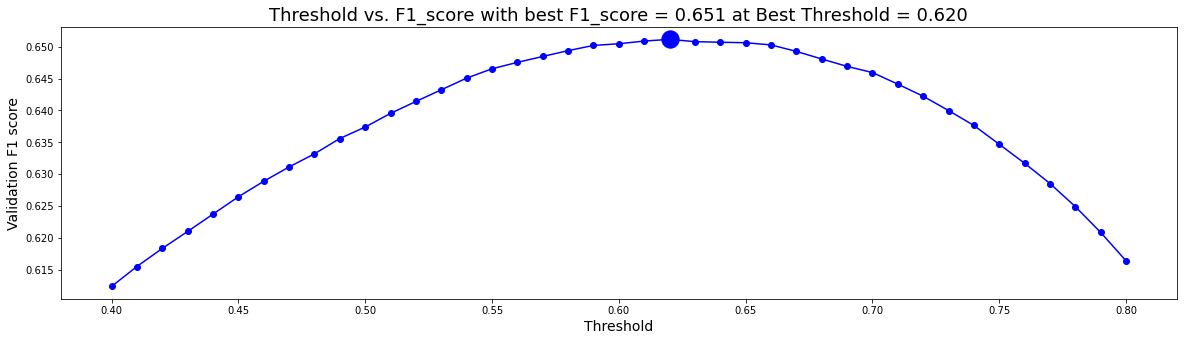

In [388]:
import matplotlib.pylab as plt
# Plot Threshold vs F1 score
plt.figure(figsize=(20,5))
plt.plot(thresholds, scores, '-o', color='blue') # plot all threshold & scores
plt.scatter([best_threshold], [best_score], color='blue', s=300, alpha=1) # make best point are more bigger
plt.xlabel('Threshold', size = 14)
plt.ylabel('Validation F1 score', size = 14)
plt.title(f'Threshold vs. F1_score with best F1_score = {best_score:.3f} at Best Threshold = {best_threshold:.3f}', size = 18)
plt.show()

In [399]:
print('When using optimal threshold...')
for k in range(18):
    # Compute F1 score per question
    m = f1_score(actual[k].values, (oof[k].values>best_threshold).astype('int'), average='macro') # Use best_threshold as threshold we choose
    # if values > best_threshold we will set as true or have prob to be correct in question.
    print(f'Q{k}: F1 = {m:.3f}')
 
# Compute F1 score overall
m = f1_score(actual.values.reshape((-1)).astype('int'), (oof.values.reshape((-1))>best_threshold).astype('int'), average='macro')
print(f'Overall F1 Score: {m:.3f}')

When using optimal threshold...
Q0: F1 = 0.573
Q1: F1 = 0.494
Q2: F1 = 0.501
Q3: F1 = 0.585
Q4: F1 = 0.569
Q5: F1 = 0.581
Q6: F1 = 0.557
Q7: F1 = 0.526
Q8: F1 = 0.575
Q9: F1 = 0.550
Q10: F1 = 0.556
Q11: F1 = 0.517
Q12: F1 = 0.491
Q13: F1 = 0.583
Q14: F1 = 0.559
Q15: F1 = 0.498
Q16: F1 = 0.528
Q17: F1 = 0.502
Overall F1 Score: 0.651


In [401]:
import jo_wilder

ModuleNotFoundError: No module named 'jo_wilder'